In [1]:
import os
import re
import tqdm
import string
import pandas as pd
import numpy as np
import util
from sklearn.decomposition import TruncatedSVD
#from data_preprocessing import *
import word_embedding_load as wel
import baseline_classification as bc
import matplotlib.pyplot as plt
import feature_selection_evaluation as fse

In [4]:
modelName = ['textModel_win=2_no_outside', 'docEmbeddings_win2_load_all.d2v']

Successfully loaded the textmodel from ../model/doc2vec/textModel_win=2_no_outside
Feature length selection, length = 225 using textModel_win=2_no_outside
Accuracy: 0.6089 ± 0.0248
NMI: 0.3867 ± 0.0264
Log_loss: 6.6325 ± 0.4868
Normalized confusion matrix
[[ 0.58761329  0.02719033  0.01208459  0.25226586  0.07099698  0.03323263
   0.01661631  0.          0.        ]
 [ 0.06827309  0.5060241   0.00803213  0.04216867  0.02409639  0.02008032
   0.3313253   0.          0.        ]
 [ 0.09375     0.05208333  0.38541667  0.1875      0.03125     0.          0.25
   0.          0.        ]
 [ 0.19707057  0.02796272  0.01464714  0.71371505  0.0252996   0.00665779
   0.01464714  0.          0.        ]
 [ 0.2659176   0.05992509  0.03745318  0.12734082  0.33707865  0.04494382
   0.12734082  0.          0.        ]
 [ 0.16161616  0.09090909  0.01010101  0.05387205  0.03703704  0.58922559
   0.05723906  0.          0.        ]
 [ 0.04933586  0.17362429  0.028463    0.03225806  0.0142315   0.0047438

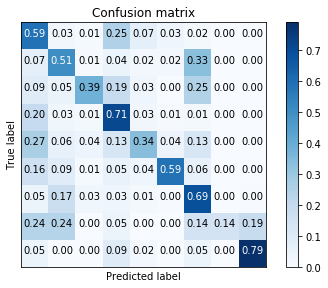

Feature length selection, length = 200 using textModel_win=2_no_outside
Accuracy: 0.6108 ± 0.0249
NMI: 0.3880 ± 0.0274
Log_loss: 6.6408 ± 0.4814
Normalized confusion matrix
[[ 0.59214502  0.02567976  0.01208459  0.24924471  0.0694864   0.03323263
   0.01812689  0.          0.        ]
 [ 0.06626506  0.50803213  0.00803213  0.04216867  0.02409639  0.02008032
   0.3313253   0.          0.        ]
 [ 0.09375     0.05208333  0.38541667  0.1875      0.03125     0.          0.25
   0.          0.        ]
 [ 0.19440746  0.02796272  0.01464714  0.71637816  0.0252996   0.00665779
   0.01464714  0.          0.        ]
 [ 0.2659176   0.05992509  0.03745318  0.12734082  0.33707865  0.04494382
   0.12734082  0.          0.        ]
 [ 0.15824916  0.09090909  0.01010101  0.05387205  0.04040404  0.58922559
   0.05723906  0.          0.        ]
 [ 0.04933586  0.17362429  0.028463    0.0313093   0.0142315   0.00474383
   0.69354839  0.          0.00474383]
 [ 0.28571429  0.23809524  0.          0. 

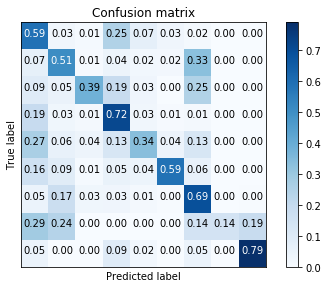

Feature length selection, length = 175 using textModel_win=2_no_outside
Accuracy: 0.6122 ± 0.0274
NMI: 0.3917 ± 0.0289
Log_loss: 6.6234 ± 0.4304
Normalized confusion matrix
[[ 0.59969789  0.02719033  0.01057402  0.24018127  0.07250755  0.02870091
   0.02114804  0.          0.        ]
 [ 0.062249    0.51807229  0.00803213  0.03815261  0.02409639  0.02008032
   0.32931727  0.          0.        ]
 [ 0.09375     0.05208333  0.375       0.1875      0.03125     0.
   0.26041667  0.          0.        ]
 [ 0.2023968   0.02663116  0.0159787   0.70705726  0.02663116  0.00665779
   0.01464714  0.          0.        ]
 [ 0.25468165  0.06367041  0.03745318  0.11985019  0.35205993  0.04494382
   0.12734082  0.          0.        ]
 [ 0.15824916  0.09090909  0.01010101  0.05387205  0.04040404  0.58922559
   0.05723906  0.          0.        ]
 [ 0.05028463  0.17647059  0.02941176  0.02656546  0.01518027  0.00474383
   0.69259962  0.          0.00474383]
 [ 0.28571429  0.28571429  0.          0.   

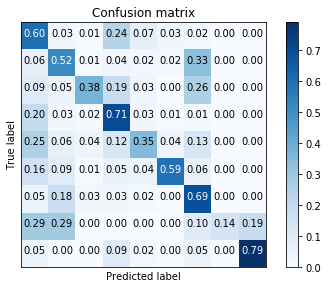

Feature length selection, length = 150 using textModel_win=2_no_outside
Accuracy: 0.6114 ± 0.0256
NMI: 0.3905 ± 0.0290
Log_loss: 6.5867 ± 0.4483
Normalized confusion matrix
[[ 0.59969789  0.02567976  0.01057402  0.24018127  0.07250755  0.03021148
   0.02114804  0.          0.        ]
 [ 0.06626506  0.51606426  0.00803213  0.03815261  0.02008032  0.02208835
   0.32931727  0.          0.        ]
 [ 0.09375     0.05208333  0.375       0.1875      0.03125     0.
   0.26041667  0.          0.        ]
 [ 0.20505992  0.02663116  0.01464714  0.70439414  0.02796272  0.00532623
   0.0159787   0.          0.        ]
 [ 0.24344569  0.06741573  0.03745318  0.11985019  0.35205993  0.04494382
   0.13483146  0.          0.        ]
 [ 0.16161616  0.08417508  0.01010101  0.06060606  0.03703704  0.58922559
   0.05723906  0.          0.        ]
 [ 0.0512334   0.17552182  0.028463    0.028463    0.01328273  0.0056926
   0.69259962  0.          0.00474383]
 [ 0.23809524  0.28571429  0.          0.    

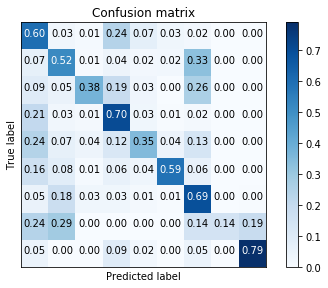

Feature length selection, length = 125 using textModel_win=2_no_outside


In [ ]:
fse.runFeatLenEval(modelName[0], [225, 200, 175, 150, 125, 100])

In [ ]:
fse.runFeatLenEval(modelName[1], [225, 200, 175, 150, 125, 100])

In [ ]:
# TODO:
'''
1, Different length of representation (SVD, for each part?), call api and get results
2, 

'''